<a href="https://colab.research.google.com/github/Raman-Dhillon/COVID_19-Prediction/blob/main/COVID_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense,
    Dropout, BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.applications import MobileNetV2, ResNet50

In [20]:
#!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git


In [21]:
BASE_DIR = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"
train_dir = os.path.join(BASE_DIR, "train")
test_dir  = os.path.join(BASE_DIR, "test")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [23]:
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        ModelCheckpoint(f"{model_name}.h5", save_best_only=True)
    ]

**CNN**

In [24]:
def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


cnn_model = build_custom_cnn()
cnn_model.summary()

cnn_history = cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks("cnn_model")
)

cnn_acc = cnn_model.evaluate(test_gen)[1]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8946 - loss: 0.6334

46/46 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8952 - loss: 0.6305 - val_accuracy: 0.3011 - val_loss: 1.6100
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9661 - loss: 0.1617 - val_accuracy: 0.3011 - val_loss: 3.1971
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9548 - loss: 0.1227 - val_accuracy: 0.3011 - val_loss: 5.7676
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9656 - loss: 0.1080 - val_accuracy: 0.3011 - val_loss: 13.3807
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9745 - loss: 0.0838 - val_accuracy: 0.3011 - val_loss: 13.7508
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9843 - loss: 0.0660 - val_accuracy: 0.3011 - val_loss: 11.6216
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 687ms/step - accuracy: 0.6524 - loss: 0.8226


**MobileNetV2**

In [25]:
def build_mobilenet():
    base = MobileNetV2(
        weights="imagenet",
        include_top=False,
        input_shape=(224,224,3)
    )
    base.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base.input, outputs=output)

    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


mobilenet_model = build_mobilenet()
mobilenet_model.summary()

mobilenet_history = mobilenet_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks("mobilenet_model")
)

mobilenet_acc = mobilenet_model.evaluate(test_gen)[1]

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7090 - loss: 0.5507

46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7113 - loss: 0.5473 - val_accuracy: 0.9475 - val_loss: 0.1650
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.9442 - loss: 0.1758

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9444 - loss: 0.1752 - val_accuracy: 0.9613 - val_loss: 0.1128
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9644 - loss: 0.1185

46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9644 - loss: 0.1185 - val_accuracy: 0.9696 - val_loss: 0.0807
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9708 - loss: 0.0913 - val_accuracy: 0.9751 - val_loss: 0.0968
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9678 - loss: 0.0871 - val_accuracy: 0.9669 - val_loss: 0.0824
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9787 - loss: 0.0620

46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9787 - loss: 0.0619 - val_accuracy: 0.9807 - val_loss: 0.0503
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9795 - loss: 0.0595 - val_accuracy: 0.9751 - val_loss: 0.0686
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9728 - loss: 0.0606 - val_accuracy: 0.9779 - val_loss: 0.0555
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9720 - loss: 0.0635 - val_accuracy: 0.9779 - val_loss: 0.0558
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.9864 - loss: 0.0345

46/46 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9863 - loss: 0.0347 - val_accuracy: 0.9779 - val_loss: 0.0489
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9800 - loss: 0.0477 - val_accuracy: 0.9613 - val_loss: 0.0665
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9889 - loss: 0.0408

46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9888 - loss: 0.0409 - val_accuracy: 0.9862 - val_loss: 0.0432
Epoch 13/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9867 - loss: 0.0382 - val_accuracy: 0.9862 - val_loss: 0.0451
Epoch 14/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9734 - loss: 0.0547 - val_accuracy: 0.9862 - val_loss: 0.0578
Epoch 15/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9892 - loss: 0.0326 - val_accuracy: 0.9834 - val_loss: 0.0463
Epoch 16/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9868 - loss: 0.0407 - val_accuracy: 0.9834 - val_loss: 0.0470
Epoch 17/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9842 - loss: 0.0315

46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9842 - loss: 0.0315 - val_accuracy: 0.9862 - val_loss: 0.0363
Epoch 18/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9797 - loss: 0.0443 - val_accuracy: 0.9890 - val_loss: 0.0376
Epoch 19/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9819 - loss: 0.0423

46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9821 - loss: 0.0421 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 20/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9853 - loss: 0.0326 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 21/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9895 - loss: 0.0426 - val_accuracy: 0.9807 - val_loss: 0.0419
Epoch 22/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9859 - loss: 0.0317

46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9860 - loss: 0.0317 - val_accuracy: 0.9917 - val_loss: 0.0282
Epoch 23/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9881 - loss: 0.0268 - val_accuracy: 0.9917 - val_loss: 0.0301
Epoch 24/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9838 - loss: 0.0449 - val_accuracy: 0.9807 - val_loss: 0.0536
Epoch 25/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9873 - loss: 0.0286 - val_accuracy: 0.9917 - val_loss: 0.0325
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9845 - loss: 0.0544


**ResNet50**

In [26]:
def build_resnet():
    base = ResNet50(
        weights="imagenet",
        include_top=False,
        input_shape=(224,224,3)
    )
    base.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base.input, outputs=output)

    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


resnet_model = build_resnet()
resnet_model.summary()

resnet_history = resnet_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks("resnet_model")
)

resnet_acc = resnet_model.evaluate(test_gen)[1]


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5096 - loss: 0.8945

46/46 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5115 - loss: 0.8917 - val_accuracy: 0.6989 - val_loss: 0.6085
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6741 - loss: 0.6280

46/46 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6740 - loss: 0.6285 - val_accuracy: 0.6989 - val_loss: 0.5985
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6799 - loss: 0.6215

46/46 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6802 - loss: 0.6215 - val_accuracy: 0.6989 - val_loss: 0.5841
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6723 - loss: 0.6243

46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6727 - loss: 0.6239 - val_accuracy: 0.6989 - val_loss: 0.5736
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6907 - loss: 0.6056

46/46 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6908 - loss: 0.6054 - val_accuracy: 0.6989 - val_loss: 0.5589
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7072 - loss: 0.5812

46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7071 - loss: 0.5812 - val_accuracy: 0.6989 - val_loss: 0.5498
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7080 - loss: 0.5652

46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7080 - loss: 0.5651 - val_accuracy: 0.6989 - val_loss: 0.5459
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7359 - loss: 0.5348

46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7356 - loss: 0.5350 - val_accuracy: 0.6989 - val_loss: 0.5221
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 990ms/step - accuracy: 0.7357 - loss: 0.5254

46/46 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7354 - loss: 0.5255 - val_accuracy: 0.6989 - val_loss: 0.5161
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7021 - loss: 0.5305

46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7025 - loss: 0.5303 - val_accuracy: 0.6989 - val_loss: 0.5074
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 0.7182 - loss: 0.5119

46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7184 - loss: 0.5118 - val_accuracy: 0.6989 - val_loss: 0.4868
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7199 - loss: 0.5050

46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7202 - loss: 0.5047 - val_accuracy: 0.6989 - val_loss: 0.4804
Epoch 13/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7465 - loss: 0.4839

46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7464 - loss: 0.4840 - val_accuracy: 0.7348 - val_loss: 0.4688
Epoch 14/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7672 - loss: 0.4621

46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7671 - loss: 0.4623 - val_accuracy: 0.7072 - val_loss: 0.4613
Epoch 15/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7902 - loss: 0.4499

46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7901 - loss: 0.4502 - val_accuracy: 0.7762 - val_loss: 0.4472
Epoch 16/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7989 - loss: 0.4562 - val_accuracy: 0.7569 - val_loss: 0.4473
Epoch 17/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8053 - loss: 0.4462

46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8052 - loss: 0.4461 - val_accuracy: 0.8729 - val_loss: 0.4272
Epoch 18/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8428 - loss: 0.4233 - val_accuracy: 0.8122 - val_loss: 0.4305
Epoch 19/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8263 - loss: 0.4065

46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8265 - loss: 0.4068 - val_accuracy: 0.8453 - val_loss: 0.4023
Epoch 20/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8352 - loss: 0.4077 - val_accuracy: 0.8481 - val_loss: 0.4052
Epoch 21/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8438 - loss: 0.4056 - val_accuracy: 0.8729 - val_loss: 0.4068
Epoch 22/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8559 - loss: 0.4080

46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8557 - loss: 0.4080 - val_accuracy: 0.8785 - val_loss: 0.3869
Epoch 23/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8462 - loss: 0.3907 - val_accuracy: 0.8785 - val_loss: 0.3967
Epoch 24/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8878 - loss: 0.3961

46/46 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8876 - loss: 0.3960 - val_accuracy: 0.8840 - val_loss: 0.3723
Epoch 25/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8681 - loss: 0.3876

46/46 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8683 - loss: 0.3874 - val_accuracy: 0.8812 - val_loss: 0.3569
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 909ms/step - accuracy: 0.6930 - loss: 0.5585


**Comparison**

In [27]:
print("\nFINAL TEST ACCURACY COMPARISON")
print(f"Custom CNN     : {cnn_acc:.4f}")
print(f"MobileNetV2    : {mobilenet_acc:.4f}")
print(f"ResNet50       : {resnet_acc:.4f}")



FINAL TEST ACCURACY COMPARISON
Custom CNN     : 0.3450
MobileNetV2    : 0.9897
ResNet50       : 0.8471


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns


In [30]:
y_true = test_gen.classes

In [31]:
def evaluate_model(model, model_name):
    # Predictions
    y_prob = model.predict(test_gen).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"\n📄 {model_name} Classification Report")
    print(classification_report(y_true, y_pred))

    # ROC-AUC
    roc_auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

    return roc_auc


Evaluating Custom CNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 656ms/step


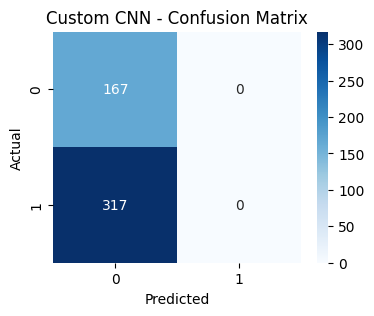


📄 Custom CNN Classification Report
              precision    recall  f1-score   support

           0       0.35      1.00      0.51       167
           1       0.00      0.00      0.00       317

    accuracy                           0.35       484
   macro avg       0.17      0.50      0.26       484
weighted avg       0.12      0.35      0.18       484



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


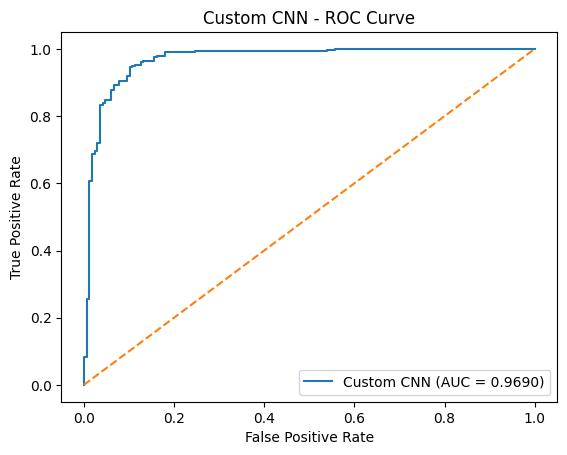


Evaluating MobileNetV2
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 916ms/step


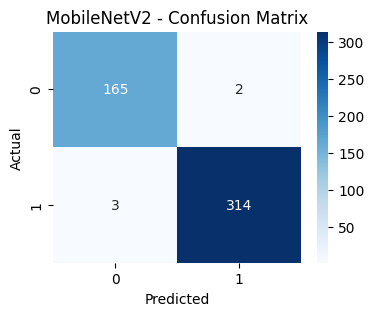


📄 MobileNetV2 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       167
           1       0.99      0.99      0.99       317

    accuracy                           0.99       484
   macro avg       0.99      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



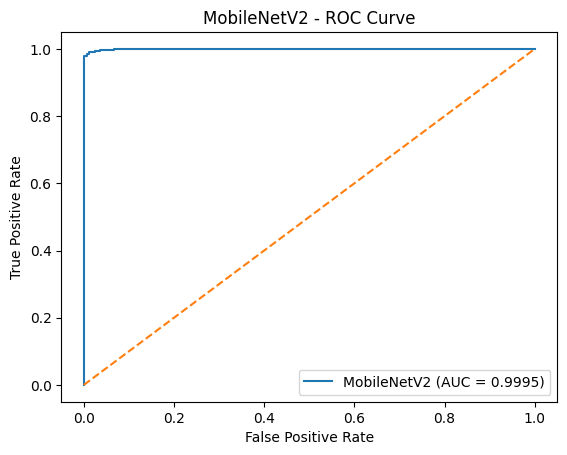


Evaluating ResNet50
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 891ms/step


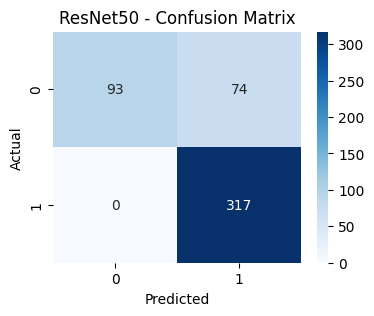


📄 ResNet50 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       167
           1       0.81      1.00      0.90       317

    accuracy                           0.85       484
   macro avg       0.91      0.78      0.81       484
weighted avg       0.88      0.85      0.83       484



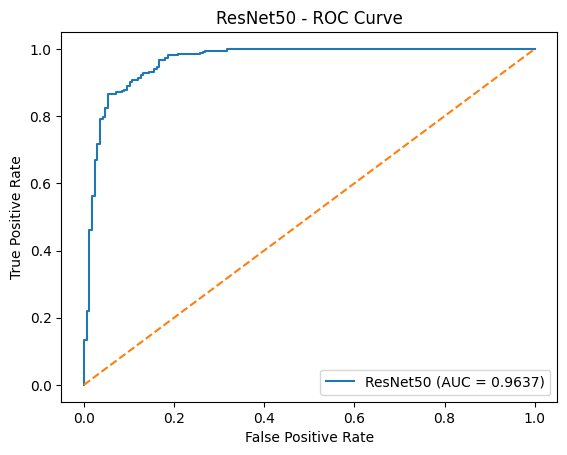

In [32]:
print("\nEvaluating Custom CNN")
cnn_auc = evaluate_model(cnn_model, "Custom CNN")

print("\nEvaluating MobileNetV2")
mobilenet_auc = evaluate_model(mobilenet_model, "MobileNetV2")

print("\nEvaluating ResNet50")
resnet_auc = evaluate_model(resnet_model, "ResNet50")

In [33]:
print("\nFINAL MODEL COMPARISON")
print("-------------------------------------------------")
print(f"Custom CNN     | Accuracy: {cnn_acc:.4f} | AUC: {cnn_auc:.4f}")
print(f"MobileNetV2    | Accuracy: {mobilenet_acc:.4f} | AUC: {mobilenet_auc:.4f}")
print(f"ResNet50       | Accuracy: {resnet_acc:.4f} | AUC: {resnet_auc:.4f}")
print("-------------------------------------------------")



FINAL MODEL COMPARISON
-------------------------------------------------
Custom CNN     | Accuracy: 0.3450 | AUC: 0.9690
MobileNetV2    | Accuracy: 0.9897 | AUC: 0.9995
ResNet50       | Accuracy: 0.8471 | AUC: 0.9637
-------------------------------------------------
